# Discriminant Analysis

## Linear Discriminant Analysis (LDA) Model from Scratch

Linear Discriminant Analysis (LDA) merupakan salah satu **supervised model**, yang biasa digunakan untuk mereduksi dimensi sekaligus sebagai clustering algorithm. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [196]:
url = "https://raw.githubusercontent.com/IngoNowitzky/LDA_Medium/main/production_line_data.csv"

# Read csv to DataFrame
data = pd.read_csv(url)

# Print first 5 lines
data.head()

,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7,Label
0,0.749080,0.919993,114.945602,0.932442,13.727151,2.903895,0.908278,Good
1,1.901429,-1.261952,104.740889,2.048815,9.016888,2.634858,3.778081,Good
2,1.463988,-0.613441,106.317961,-1.294561,14.625247,1.755185,4.307704,Good
3,1.197317,0.653123,109.033556,-2.686570,13.902569,2.466063,3.553937,Good
4,0.312037,-0.071643,110.182667,-2.449227,14.431973,1.825483,3.623181,Good


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Station_1  20000 non-null  float64
 1   Station_2  20000 non-null  float64
 2   Station_3  20000 non-null  float64
 3   Station_4  20000 non-null  float64
 4   Station_5  20000 non-null  float64
 5   Station_6  20000 non-null  float64
 6   Station_7  20000 non-null  float64
 7   Label      20000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [3]:
data.describe()

,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.998689,-0.002472,125.000210,-0.995950,11.487429,2.505333,3.494414
std,0.577006,1.151520,14.441149,2.294479,2.027949,1.446818,2.020641
min,0.000023,-1.999978,100.000422,-4.998960,8.000205,0.000138,0.000398
25%,0.499774,-0.998176,112.549949,-2.977451,9.709597,1.242712,1.737593
50%,0.997864,0.004245,124.999161,-0.988751,11.509644,2.513874,3.492975
75%,1.498282,0.984467,137.607742,0.998488,13.253729,3.761920,5.240301
max,1.999850,1.999604,149.998607,2.999001,14.999944,4.999313,6.999449


In [197]:
y_bad = data[data['Label']=='Bad']
y_good = data[data['Label']=='Good'].sample(len(y_bad), random_state=42)
data = pd.concat([y_bad,y_good])

In [198]:
data['Label'].value_counts()

Label
Bad     969
Good    969
Name: count, dtype: int64

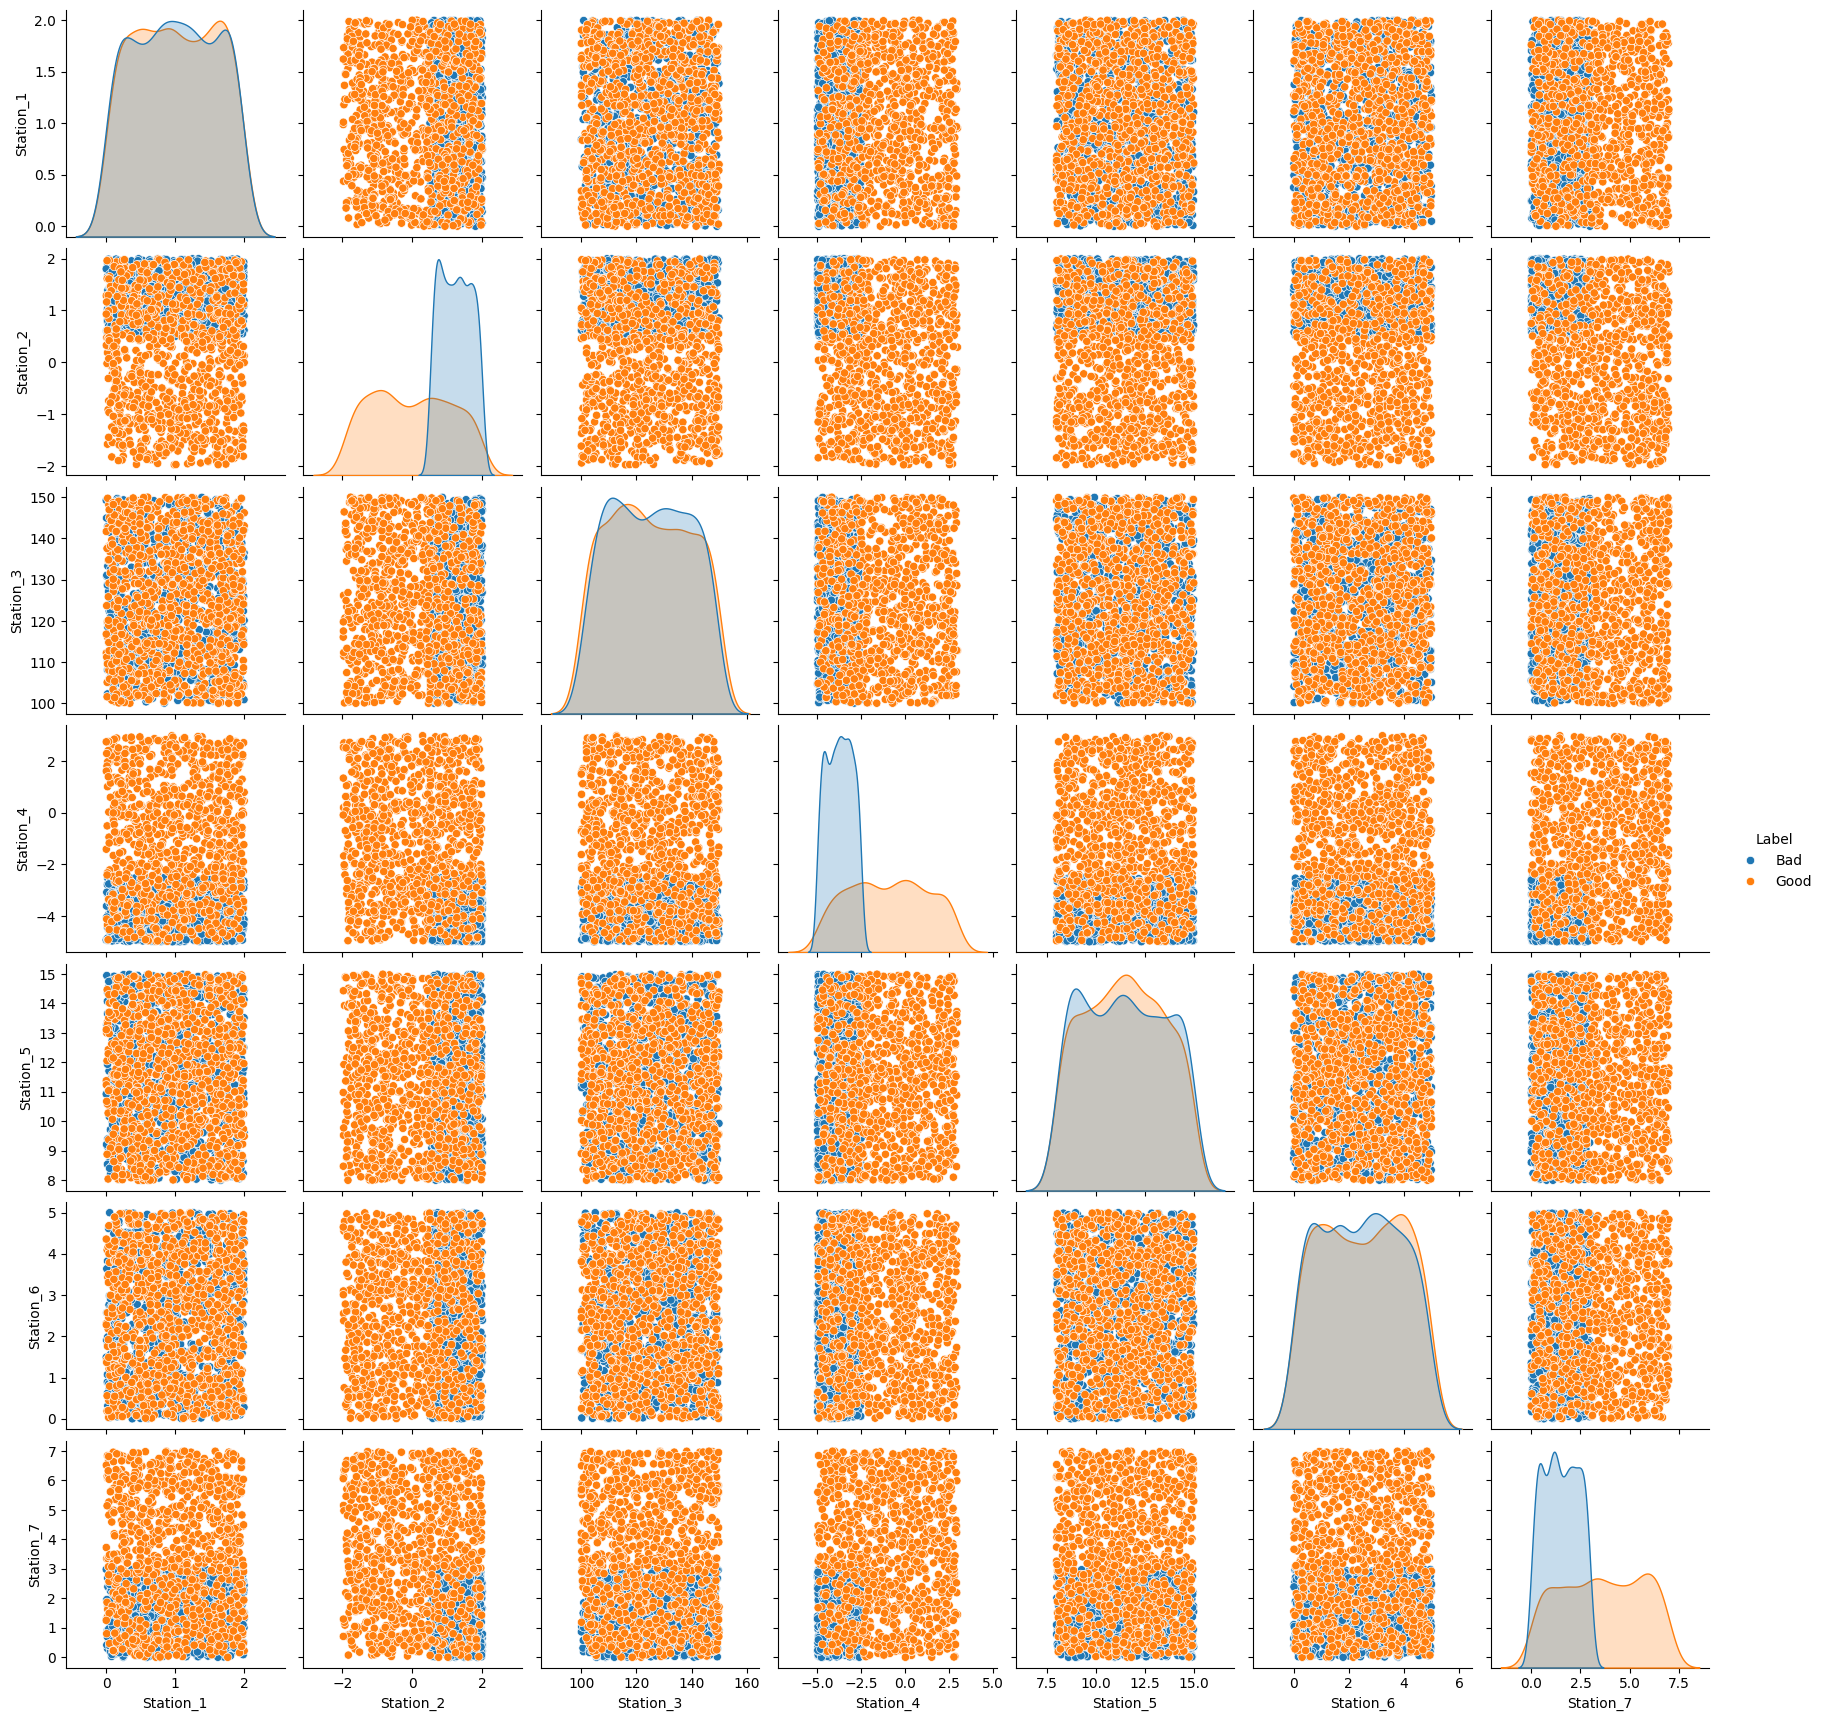

In [5]:
sns.pairplot(data, hue='Label')
plt.show()

### Build LDA Model from Scratch

In [144]:
X = data.drop(columns='Label')
y = data['Label']

In [145]:
# Number of features
d = X.shape[1]

# Class distinct
data['Label'] = data['Label'].replace({'Bad' : 1, 'Good' : 0})
classes = data['Label'].unique()

# Mean of each feature of each class 
mean_vec = []
for k in classes:
    mean_vec.append(np.array((data[data['Label']==k].mean()[:7])))
    
# Global mean
global_mean = np.mean(X, axis = 0)

C:\Users\Azriel Akbar\AppData\Local\Temp\ipykernel_3336\2474414388.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'Bad' : 1, 'Good' : 0})


In [148]:
# Scatter matrices
Sw = np.zeros((d,d)) # Within-classes
Sb = np.zeros((d,d)) # Between-classes

for k in classes:
    Xk = data.loc[:,:'Station_7'][data['Label']==k]
    nk = Xk.shape[0]
        
    mean_k = np.array(mean_vec[k]).reshape(d,1) # sebenarnya sama saja dengan mean_vec
    global_mean = np.array(global_mean).reshape(d,1)

    Sw += (Xk - mean_k.T).T @ (Xk - mean_k.T)
    diff_mean = mean_k - global_mean
    Sb += nk * (diff_mean @ diff_mean.T)

In [149]:
from numpy.linalg import eig, inv

# Hitung eigenvalues dan eigenvectors
eigvals, eigvecs = eig(np.dot(inv(Sw), Sb))

In [150]:
# Urutkan eigenvalues dan eigenvectors
eigpairs = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
eigpairs = sorted(eigpairs[::-1], reverse=True)

In [152]:
W = eigpairs[0][1].reshape(7,1) # LDA = k - 1, if d > k. 

In [153]:
# memproyeksikan data asli ke subspace baru (dimensi lebih rendah)
Z = np.dot(X_scaled,W)

In [154]:
data['PC1'] = Z[:,0]

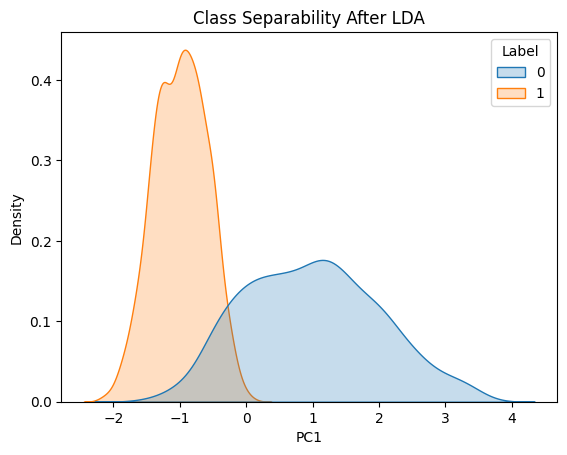

In [155]:
sns.kdeplot(data, x='PC1',hue='Label', fill=True)
plt.title("Class Separability After LDA")
plt.show()

### LDA using Sklearn

In [199]:
data['Label'] = data['Label'].replace({'Bad' : 1, 'Good' : 0})
X = data.drop(columns='Label')
y = data['Label']

C:\Users\Azriel Akbar\AppData\Local\Temp\ipykernel_3336\1028023292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'Bad' : 1, 'Good' : 0})


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42) 

In [201]:
lda = LDA()
X_lda = lda.fit_transform(X_train, y_train)

In [211]:
train_df = X_train.merge(y_train, left_index=True, right_index=True)
train_df['PC1'] = X_lda[:,0]
train_df

,Station_1,Station_2,Station_3,Station_4,Station_5,Station_6,Station_7,PC1,Label
7663,1.000717,-1.471537,137.510569,-2.368856,8.789170,2.374118,3.424778,-1.722388,0
19368,1.547463,1.368965,122.564471,-3.940726,8.101770,4.463771,2.726431,0.985744,1
9687,0.596085,1.637713,112.408244,-3.782741,14.974470,4.292799,1.743196,1.545710,1
7472,1.741594,-1.177419,119.759620,1.594160,8.972348,1.081983,1.856701,-2.525409,0
5234,1.009275,1.774523,107.447353,-4.434526,10.044689,1.586647,0.306307,2.393576,1
...,...,...,...,...,...,...,...,...,...
14929,0.865410,0.684649,114.099226,2.600370,14.811579,1.479876,3.088525,-2.059294,0
17489,1.863215,1.970000,107.501819,-2.324229,9.713417,4.295603,4.223423,0.230402,0
17348,1.267947,1.441454,125.393648,-3.584942,11.277981,1.475290,0.973098,1.656144,1
10939,0.040560,-0.969181,129.172634,-0.947079,11.139683,4.001816,2.568026,-1.703166,0


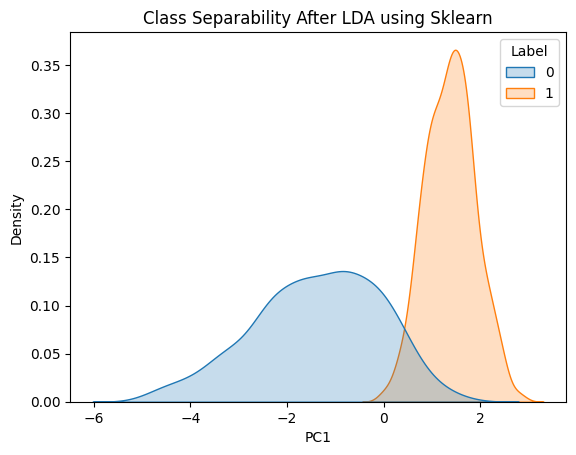

In [206]:
sns.kdeplot(train_df, x='PC1',hue='Label', fill=True)
plt.title("Class Separability After LDA using Sklearn")
plt.show()

In [207]:
y_pred = lda.predict(X_test)

In [208]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9020618556701031

Confusion Matrix:
 [[235  57]
 [  0 290]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       292
           1       0.84      1.00      0.91       290

    accuracy                           0.90       582
   macro avg       0.92      0.90      0.90       582
weighted avg       0.92      0.90      0.90       582



### Classification using Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [218]:
y_pred = logit.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9381443298969072

Confusion Matrix:
 [[268  24]
 [ 12 278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       292
           1       0.92      0.96      0.94       290

    accuracy                           0.94       582
   macro avg       0.94      0.94      0.94       582
weighted avg       0.94      0.94      0.94       582

